# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals is studying the effects of certain drugs on tumor development in lab mice. Due to an error in data collection, one mouse has been omitted from the analysis (g989).

Based on the statistics asked, Infubinol and Ceftamin appear to increase tumor growth in vivo, whereas Capomulin and Ramicane reduce tumor growth. Additionally, it appears that Capomulin has reduced tumor size over the span of 35 days. Finally, tumor size appears to have a positive relationship with mouse weight.
 

In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_df = pd.merge(mouse_metadata, study_results, how = "right", on = "Mouse ID")
# Display the data table for preview
full_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0


In [65]:
# Checking the number of mice.
full_df["Mouse ID"].nunique()

249

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Get rid of duplicate timepoints for a mouse by excluding the mouse altogether 

# .loc[~ ] turns a statement negative
new_df = full_df.loc[~full_df["Mouse ID"].isin(["g989"])]

#alternative way
# new_df = full_df.loc[~full_df.duplicated(subset=["Mouse ID", "Timepoint"]), :] # duplicated returns boolean--
# full_df.drop_duplicates()
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1
1889,m601,Capomulin,Male,22,17,30,31.758275,1
1890,m601,Capomulin,Male,22,17,35,30.834357,1
1891,m601,Capomulin,Male,22,17,40,31.378045,1


In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
full_df.loc[full_df["Mouse ID"].isin(["g989"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
860,g989,Propriva,Female,21,26,0,45.000000,0
861,g989,Propriva,Female,21,26,0,45.000000,0
862,g989,Propriva,Female,21,26,5,48.786801,0
863,g989,Propriva,Female,21,26,5,47.570392,0
864,g989,Propriva,Female,21,26,10,51.745156,0
865,g989,Propriva,Female,21,26,10,49.880528,0
866,g989,Propriva,Female,21,26,15,51.325852,1
867,g989,Propriva,Female,21,26,15,53.442020,0
868,g989,Propriva,Female,21,26,20,55.326122,1
869,g989,Propriva,Female,21,26,20,54.657650,1


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# full_df = full_df.loc[~full_df.duplicated(subset=["Mouse ID", "Timepoint"]), :] # duplicated returns boolean--
# full_df

In [69]:
# Checking the number of mice in the clean DataFrame.
new_df["Mouse ID"].nunique()

248

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df = full_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
clean_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

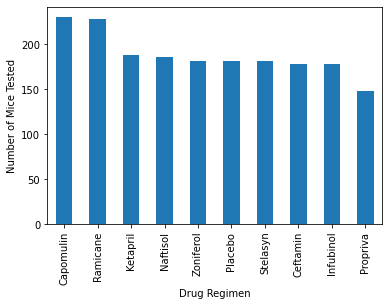

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = new_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show() 

Text(0, 0.5, 'Number of Mice Tested')

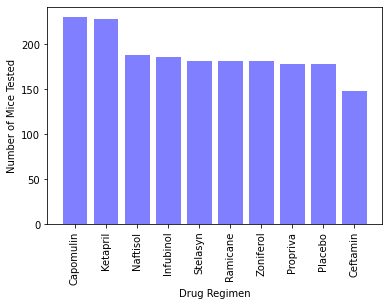

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_type = new_df.drop_duplicates(subset=["Drug Regimen"])
mouse = new_df["Drug Regimen"].value_counts()

plt.bar(drug_type["Drug Regimen"], mouse, color = "blue", alpha = 0.5, align = "center")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

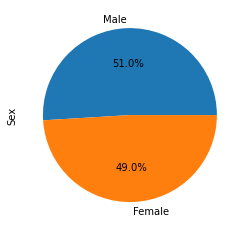

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = new_df.Sex.value_counts()
counts.plot(kind="pie",autopct='%0.1f%%')
plt.show()

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
    #.max()
last_time = new_df.groupby(["Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time = last_time.reset_index()

merged_data = last_time.merge(new_df,
                              on=['Mouse ID','Timepoint'],
                              how="left")
merged_data.head(3)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # in Drug Regimen of merged_data, output the drug and associated max tumor volume (Tumor Volume (mm3))
        # and place in object fine_tumor_vol
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 
                                      'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

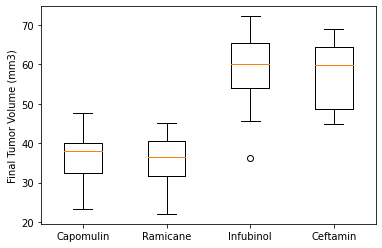

In [106]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
plt.boxplot(tumor_vol)
ax1.set_xticklabels(drug_list)
plt.ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

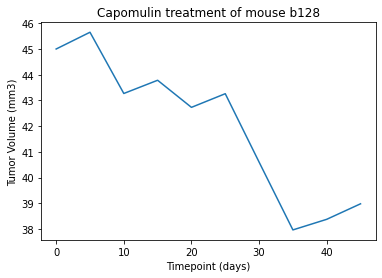

In [189]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse1 = full_df.loc[full_df["Mouse ID"].isin(["b128"])]
plt.plot(mouse1["Timepoint"], mouse1["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0.5, 0, 'Weight (g)')

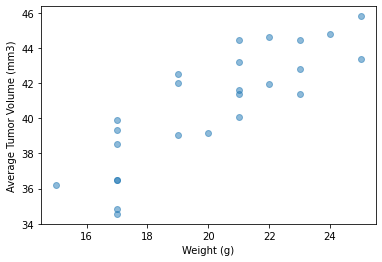

In [175]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
av_tumor = full_df[full_df["Drug Regimen"] =="Capomulin"].groupby(["Mouse ID"]).mean()
mass = merged_data.loc[merged_data["Drug Regimen"].isin(["Capomulin"])]

plt.scatter(mass["Weight (g)"], av_tumor["Tumor Volume (mm3)"], alpha = 0.5)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

Text(0, 50, 'y = 0.95x + 21.55')

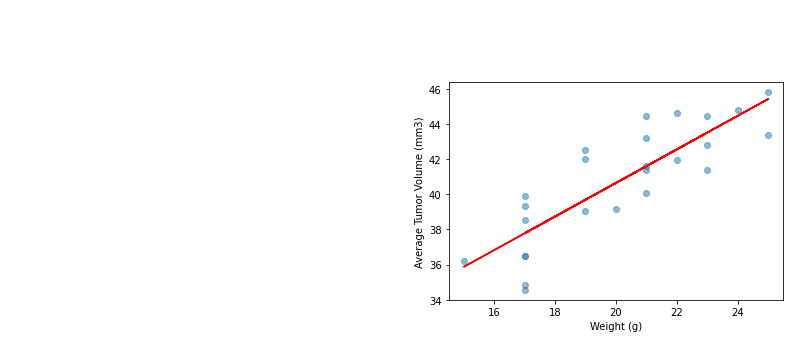

In [184]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(mass["Weight (g)"], av_tumor["Tumor Volume (mm3)"], alpha = 0.5)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(mass["Weight (g)"], av_tumor["Tumor Volume (mm3)"])
regress_values = mass["Weight (g)"] * slope + intercept
plt.plot(mass["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

